## Youtube Trending Video Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
df = pd.read_csv(r"C:\Users\SALOME\Downloads\Requirments (6)\USvideos.csv")

In [3]:
PLOT_COLORS = ["#268bd2", "#0052cc", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## Data Exploration

In [4]:
print(df.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [5]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               505
dtype: int64

In [6]:
df['description'] = df['description'].fillna(value="")

In [7]:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [8]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,35349.00,35349.00,35349.00,35349.00,35349.00
mean,20.10,1902529.32,61493.63,3097.44,7066.05
std,7.52,5839415.14,181625.60,29569.72,30680.32
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,201980.00,4485.00,170.00,526.00
50%,24.00,561752.00,15163.00,531.00,1589.00
75%,25.00,1501028.00,45309.00,1602.00,4692.00
max,43.00,149376127.00,3749810.00,1674420.00,1361580.00


In [10]:
# The average number of views of a trending video is 1902529.
# The median value of the number of views is 561,752, which means that half of the
# Trending videos have less than this number and the other half have views greater than this number
# The average number of likes for a trending video is 61,493 while the median of 
# likes is 15,163. The average number of comments is 7,066 while the median is 1,589.

## Data Visualization

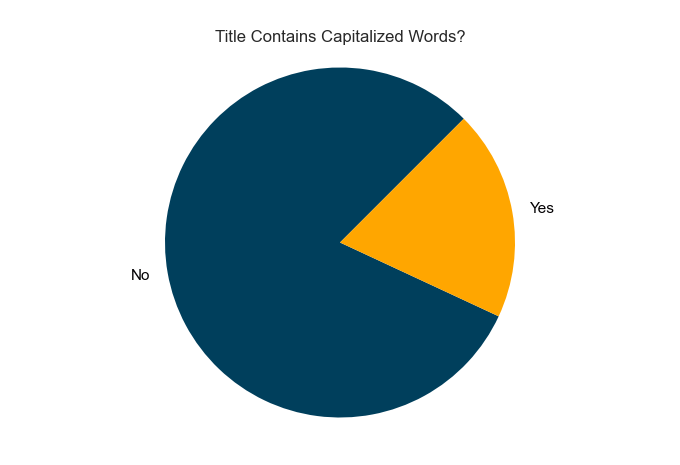

In [11]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
        return False
    
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
    
value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Words?')

C:\Users\SALOME\AppData\Local\Temp\ipykernel_10772\2501313291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


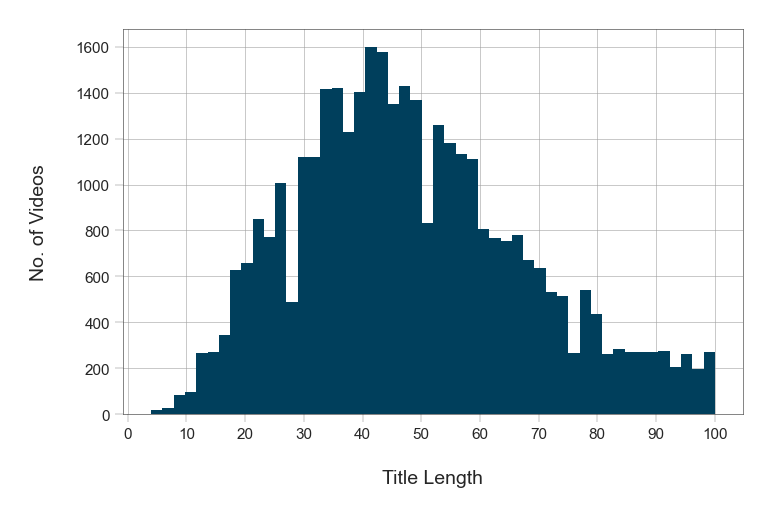

In [12]:
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of Videos", xticks=range(0, 110, 10))

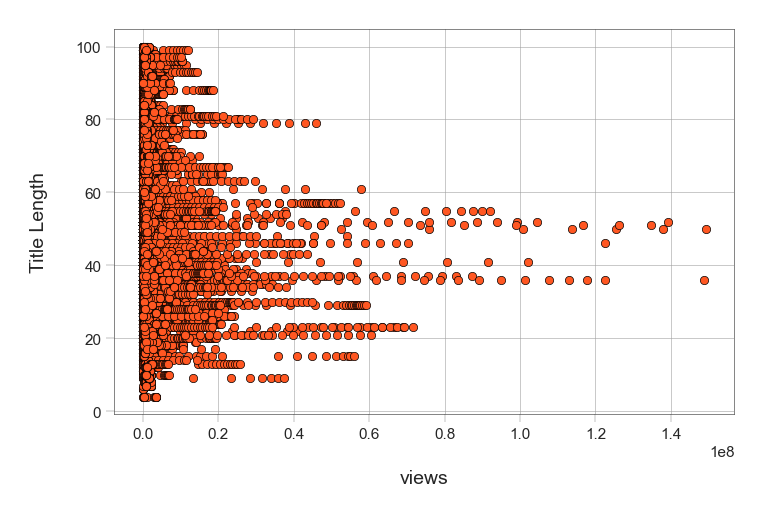

In [13]:
fig, ax = plt.subplots()
_= ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors='#000000', linewidth=0.5)
_= ax.set(xlabel="views", ylabel="Title Length")

## Correlation

C:\Users\SALOME\AppData\Local\Temp\ipykernel_10772\2982467395.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


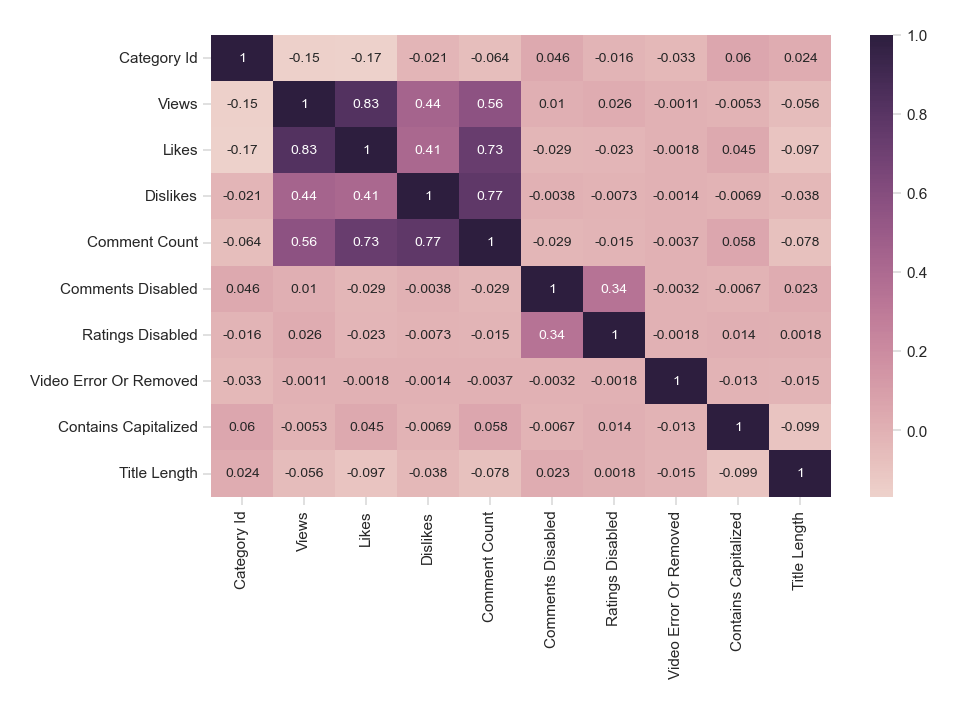

In [23]:
h_labels = [x.replace('_', ' ').title() for x in
           list(df.select_dtypes(include = ['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


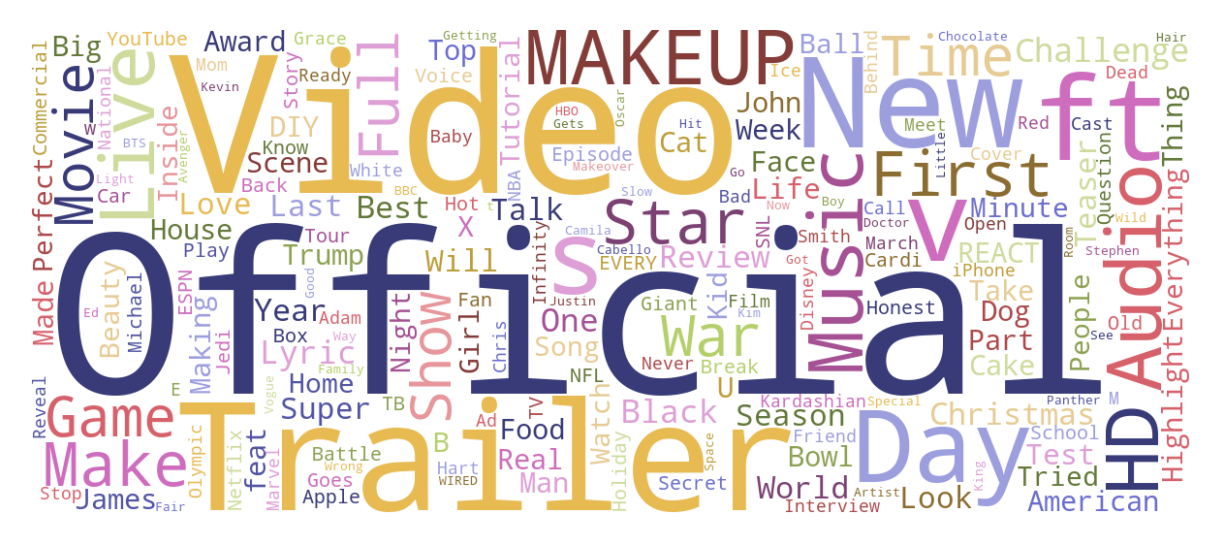

In [24]:
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud (width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap = "tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")